### Notebook for generating the LCTA fit on the Vehpi data figure

In [2]:
using CairoMakie
using CSV 
using DataFrames
using RData

In [5]:
file_path = "C:/Users/20192809/OneDrive - TU Eindhoven/TUe/Thesis/R shenanigans/Vehpi data/plot_data.RData"

data = load(file_path)["plot_data"]

Row,Simulation,Timepoint,Cluster,State_Variable,Value
,Int32,Float64,Int32,String,Float64
1,0,0.0,1,glucose,4.55466
2,0,0.0,1,insulin,10.1198
3,0,300.0,1,glucose,4.55402
4,0,300.0,1,insulin,10.1188
5,0,600.0,1,glucose,5.16559
6,0,600.0,1,insulin,16.5001
7,0,900.0,1,glucose,5.41396
8,0,900.0,1,insulin,19.9571
9,0,1200.0,1,glucose,5.43568


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\20192809\.julia\packages\Makie\VRavR\src\scenes.jl:220


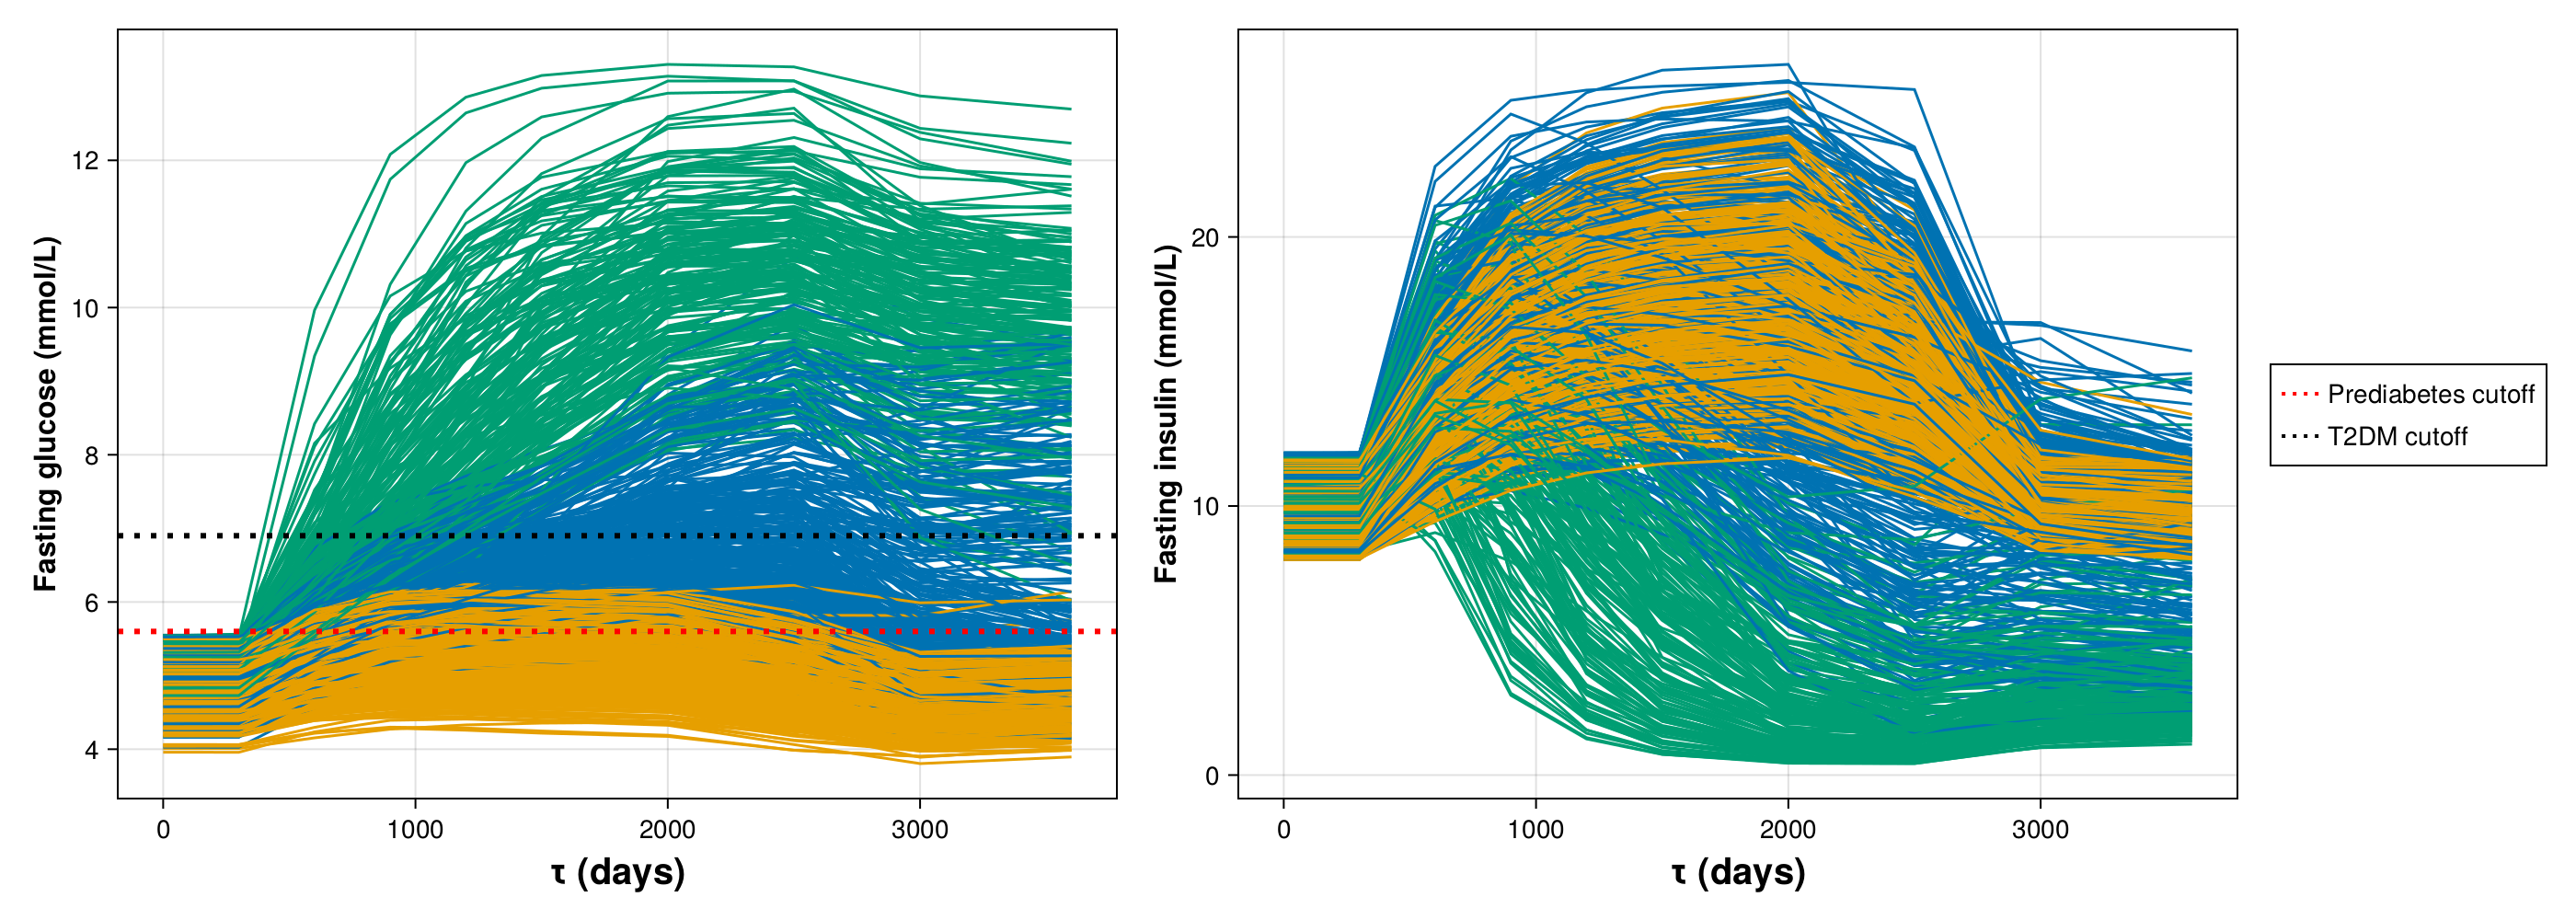

In [24]:
using CairoMakie
# data_filtered = filter(row -> row.Cluster != 1, data)
# Define colours
colors = Makie.wong_colors()
cluster_ids = unique(data.Cluster)  # Get unique cluster IDs
cluster_colors = Dict(cluster_ids .=> colors[mod1.(cluster_ids, length(colors))])  # Assign colours

# Create figure with a wider resolution
fig = Figure(resolution = (1400, 500))

# Glucose plot (left)
ax1 = Axis(fig[1, 1], 
    xlabel = "τ (days)", 
    ylabel = "Fasting glucose (mmol/L)", 
    xlabelsize = 20, ylabelsize = 16, xticklabelsize = 14, yticklabelsize = 14, 
    xlabelfont = :bold, ylabelfont = :bold
)

# Insulin plot (right)
ax2 = Axis(fig[1, 2], 
    xlabel = "τ (days)", 
    ylabel = "Fasting insulin (mmol/L)", 
    xlabelsize = 20, ylabelsize = 16, xticklabelsize = 14, yticklabelsize = 14, 
    xlabelfont = :bold, ylabelfont = :bold
)

# Group by Simulation ID
for (sim_id, sim_data) in pairs(groupby(data, :Simulation))
    cluster = first(sim_data.Cluster)  # Get cluster of this simulation
    cluster_color = cluster_colors[cluster]  # Assign colour

    # Extract glucose & insulin separately
    glucose_data = filter(row -> row.State_Variable == "glucose", sim_data)
    insulin_data = filter(row -> row.State_Variable == "insulin", sim_data)

    # Plot lines
    if !isempty(glucose_data)
        lines!(ax1, glucose_data.Timepoint, glucose_data.Value, color = cluster_color)
    end
    if !isempty(insulin_data)
        lines!(ax2, insulin_data.Timepoint, insulin_data.Value, color = cluster_color)
    end
end

# Add horizontal dotted lines for glucose thresholds
hlines!(ax1, [5.6], linestyle=:dot, linewidth=3, color=:red)
hlines!(ax1, [6.9], linestyle=:dot, linewidth=3, color=:black)

# Add legend for glucose thresholds
Legend(fig[1, 3], 
    [LineElement(color=:red, linestyle=:dot, linewidth=2), 
     LineElement(color=:black, linestyle=:dot, linewidth=2)], 
     ["Prediabetes cutoff", "T2DM cutoff"])

# Display figure
fig

# Save figure
# save("./LCTA_fit_Vehpi_data.png", fig)
